In [62]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap


import warnings
warnings.filterwarnings('ignore')

The analysis in this notebook will focused on Fairfield County, Connecticut. The research questions that I will attmept to answer are:
1. Do changes in community mobility corrolates with COVID19 confirmed cases in Fairfield County?
2. If so, does this help with disease modeling and prediction? What can we about mobility and spread of COVID?

The hypothesis that I will be testing is that there is a negative correlation between case numbers and mobility in:
1. Retail and Recreation
2. Grocery and Pharmacy
3. TransiP
4. Workplace

And there is a positive correlation between case numbers and mobility in:
1. Parks
2. Residential


In [2]:
# Read in the csv files
confirmed_cases = pd.read_csv("raw_data/CONVENIENT_us_confirmed_cases.csv")
gcmr_2020 = pd.read_csv("raw_data/2020_US_Region_Mobility_Report.csv")
gcmr_2021 = pd.read_csv("raw_data/2021_US_Region_Mobility_Report.csv")

## Clean and process data:

In [3]:
# filter the data to only fairfield, ct
ff_cc = confirmed_cases[['Province_State','Connecticut']]
ff_cc = ff_cc.rename(columns={'Province_State': 'date', 'Connecticut':'confirmed_cases'})
ff_cc = ff_cc.drop(labels=0, axis=0)

ff_gcmr_2020 = gcmr_2020.loc[(gcmr_2020['sub_region_2'] == 'Fairfield County') & (gcmr_2020['sub_region_1'] == 'Connecticut')]
ff_gcmr_2021 = gcmr_2021.loc[(gcmr_2021['sub_region_2'] == 'Fairfield County') & (gcmr_2021['sub_region_1'] == 'Connecticut')]

ff_gcmr_2020 = ff_gcmr_2020.drop(columns=['metro_area', 'iso_3166_2_code','place_id', 'country_region_code', 'country_region', 'sub_region_2', 'sub_region_1'])
ff_gcmr_2021 = ff_gcmr_2021.drop(columns=['metro_area', 'iso_3166_2_code','place_id', 'country_region_code', 'country_region', 'sub_region_2', 'sub_region_1'])

In [4]:
# write out clean data 
ff_cc.to_csv('clean_data/ff_confirmed_cases.csv', index=False)
ff_gcmr_2020.to_csv('clean_data/ff_gcmr_2020.csv', index=False)
ff_gcmr_2021.to_csv('clean_data/ff_gcmr_2021.csv', index=False)

The Community Mobility Reportas and confirmed cases in the US are available for the follwoing periods:<br>
**Google Mobility Reports 2020:** 2/15/2020 - 12/31/2020<br>
**Google Mobility Reports 2021:** 1/1/2021 - 10/15/2021<br>
**JHU Confirmed Cases:** 1/23/2020 - 10/15/2021<br>

This analysis will be from 2/1/2020 - 10/15/2021. I will look into ...

In [5]:
# convert date columns to datetime
ff_cc['date'] = pd.to_datetime(ff_cc['date'])
ff_gcmr_2020['date'] = pd.to_datetime(ff_gcmr_2020['date'])
ff_gcmr_2021['date'] = pd.to_datetime(ff_gcmr_2021['date'])

In [6]:
# combine gcmer 2020 and 2021 into one dataframe
ff_gcmr = ff_gcmr_2020.append(ff_gcmr_2021, ignore_index=True)

In [7]:
# merge gcmer and confirmed cases
ff_df = pd.merge(ff_gcmr, ff_cc, how='outer', on='date')

In [8]:
# keep only rows from 2/1/2020 to 10/15/2021
mask = (ff_df['date'] > '2020-1-31') & (ff_df['date'] <= '2021-10-15')
ff_df = ff_df.loc[mask]
ff_df.sort_values(by='date')

,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,confirmed_cases
640,NaN,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0
641,NaN,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
642,NaN,2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0
643,NaN,2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,0.0
644,NaN,2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
604,9001.0,2021-10-11,-2.0,-1.0,75.0,2.0,-39.0,8.0,0.0
605,9001.0,2021-10-12,-5.0,0.0,65.0,-6.0,-28.0,4.0,332.0
606,9001.0,2021-10-13,-8.0,1.0,52.0,-10.0,-29.0,5.0,53.0
607,9001.0,2021-10-14,-6.0,0.0,76.0,-3.0,-27.0,4.0,159.0


,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,confirmed_cases
640,NaN,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0
641,NaN,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
642,NaN,2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0
643,NaN,2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,0.0
644,NaN,2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
604,9001.0,2021-10-11,-2.0,-1.0,75.0,2.0,-39.0,8.0,0.0
605,9001.0,2021-10-12,-5.0,0.0,65.0,-6.0,-28.0,4.0,332.0
606,9001.0,2021-10-13,-8.0,1.0,52.0,-10.0,-29.0,5.0,53.0
607,9001.0,2021-10-14,-6.0,0.0,76.0,-3.0,-27.0,4.0,159.0


In [9]:
# write out clean data 
ff_gcmr.to_csv('clean_data/ff_gcmr.csv', index=False)
ff_df.to_csv('clean_data/ff_confirmed_cases_mobility.csv', index=False)

## Analysis:

In [10]:
ff_df = ff_df.dropna()

In [35]:
ff_df["confirmed_cases"] = pd.to_numeric(ff_df["confirmed_cases"])
cc_col = ff_df['confirmed_cases']
date = ff_df['date']
# convert the mobility indicators to differences from the baseline, so "1" is the baseline value
retail = ff_df['retail_and_recreation_percent_change_from_baseline']
grocery = ff_df['grocery_and_pharmacy_percent_change_from_baseline']
parks = ff_df['parks_percent_change_from_baseline']
transit = ff_df['transit_stations_percent_change_from_baseline']
workplace = ff_df['workplaces_percent_change_from_baseline']
residential = ff_df['residential_percent_change_from_baseline']


In [36]:
retail_cor = retail.corr(cc_col)
grocery_cor = grocery.corr(cc_col)
parks_cor = parks.corr(cc_col)
transit_cor = transit.corr(cc_col)
workplace_cor = workplace.corr(cc_col)
residential_cor = residential.corr(cc_col)

* Plot trends in 6 categories
* Plot correlation to confirmed cases

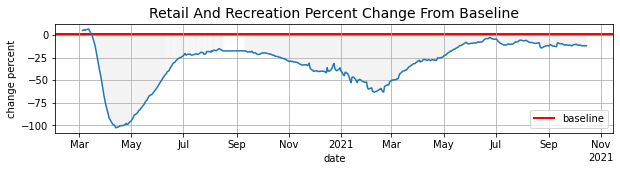

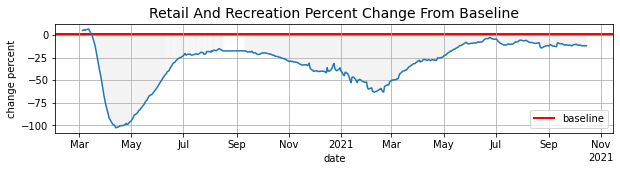

In [37]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.bar(date, retail.rolling(20).sum()/10, color=(0.01, 0.01, 0.01, 0.01), width = 4)
ax.plot(date, retail.rolling(20).sum()/10)

ax.axhline(y=1,xmin=0,xmax=3,c="red",linewidth=2,zorder=0, label='baseline')
ax.legend()

ax.set_title('Retail And Recreation Percent Change From Baseline', fontsize = 14)
ax.set_ylabel('change percent')
ax.set_xlabel('date')


ax.axhline(y=0,xmin=0,xmax=3,c="red",linewidth=2,zorder=0)

ax.grid(True)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))


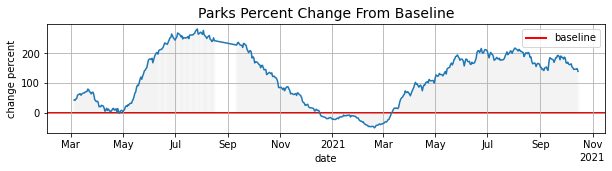

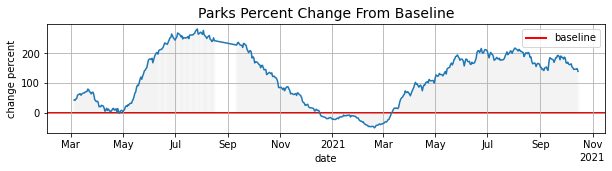

In [38]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.bar(date, parks.rolling(20).sum()/10, color=(0.01, 0.01, 0.01, 0.01), width = 4)
ax.plot(date, parks.rolling(20).sum()/10)


ax.axhline(y=0,xmin=0,xmax=3,c="red",linewidth=2,zorder=0, label='baseline')
ax.legend()

ax.set_title('Parks Percent Change From Baseline', fontsize = 14)
ax.set_ylabel('change percent')
ax.set_xlabel('date')

ax.grid(True)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

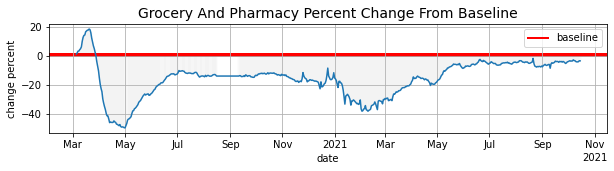

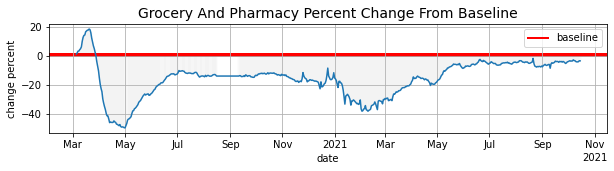

In [39]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.bar(date, grocery.rolling(20).sum()/10, color=(0.01, 0.01, 0.01, 0.01), width = 4)
ax.plot(date, grocery.rolling(20).sum()/10)

ax.axhline(y=0,xmin=0,xmax=3,c="red",linewidth=2,zorder=0, label='baseline')
ax.legend()

ax.set_title('Grocery And Pharmacy Percent Change From Baseline', fontsize = 14)
ax.set_ylabel('change percent')
ax.set_xlabel('date')


ax.axhline(y=1,xmin=0,xmax=3,c="red",linewidth=2,zorder=0)

ax.grid(True)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

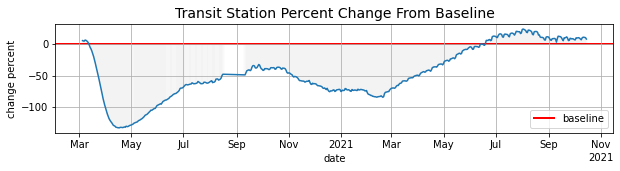

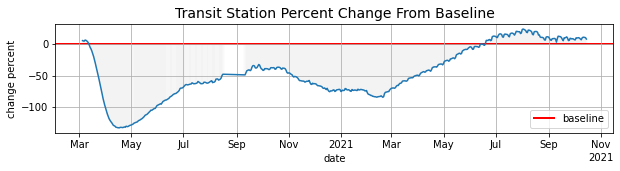

In [40]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.bar(date, transit.rolling(20).sum()/10, color=(0.01, 0.01, 0.01, 0.01), width = 4)
ax.plot(date, transit.rolling(20).sum()/10)

ax.axhline(y=0,xmin=0,xmax=3,c="red",linewidth=2,zorder=0, label='baseline')
ax.legend()
ax.set_ylabel('change percent')
ax.set_xlabel('date')


ax.set_title('Transit Station Percent Change From Baseline', fontsize = 14)


ax.grid(True)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

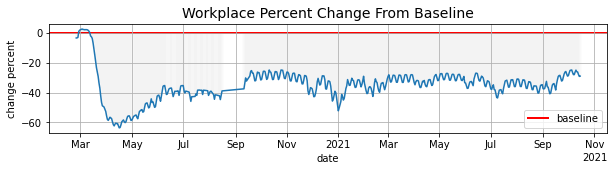

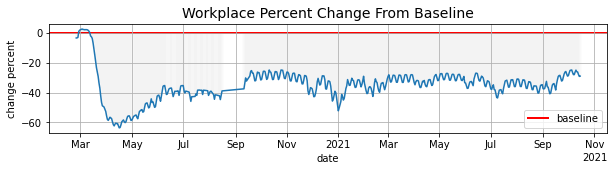

In [41]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.bar(date, workplace.rolling(11).sum()/10, color=(0.01, 0.01, 0.01, 0.01), width = 4)
ax.plot(date, workplace.rolling(11).sum()/10)

ax.axhline(y=0,xmin=0,xmax=3,c="red",linewidth=2,zorder=0, label='baseline')
ax.legend()
ax.set_ylabel('change percent')
ax.set_xlabel('date')


ax.set_title('Workplace Percent Change From Baseline', fontsize = 14)

ax.grid(True)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

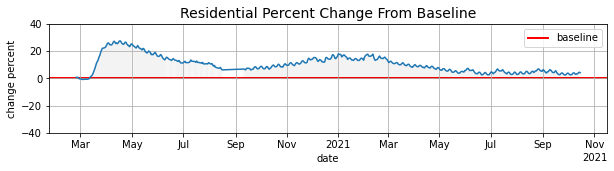

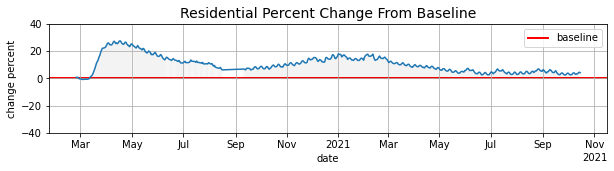

In [42]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.bar(date, residential.rolling(11).sum()/10, color=(0.01, 0.01, 0.01, 0.01), width = 4)
ax.plot(date, residential.rolling(11).sum()/10)
ax.yaxis.set_ticks(np.arange(-40, 60, 20))

ax.axhline(y=0,xmin=0,xmax=3,c="red",linewidth=2,zorder=0, label='baseline')
ax.legend()
ax.set_ylabel('change percent')
ax.set_xlabel('date')


ax.set_title('Residential Percent Change From Baseline', fontsize = 14)

ax.grid(True)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

In [43]:
# new_cases = cases - lag(cases, 1),
# pct_change = (new_cases - lag(new_cases, 1))/lag(new_cases, 1),
# pct_increase = (cases - lag(cases, 1))/lag(cases, 1)

ff_df['new_cases'] = ff_df['confirmed_cases'].diff()
ff_df['pct_change'] = ff_df['new_cases'].pct_change()
ff_df['pct_increase'] = ff_df['confirmed_cases'].pct_change()
ff_df['population'] = 957419

In [52]:
# Calculate the incidence of reported cases by 100,000 population:

ff_df['incidence'] = ff_df['confirmed_cases']/(ff_df['population']/100000)
ff_df['log_incidence'] = np.log2(ff_df['incidence'])
ff_df['log_new_cases'] = np.log2(ff_df['incidence'] + 0.001)

In [91]:
df = pd.read_csv("clean_data/clean_r_data.csv")

In [87]:
cols = ['pct_increase', 'Mean_retail_lag11'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [93]:
df.to_csv('clean_data/clean_r_data_no_outlier.csv')

In [92]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:xlabel='Mean_retail_lag11', ylabel='pct_increase'>

<AxesSubplot:xlabel='Mean_retail_lag11', ylabel='pct_increase'>

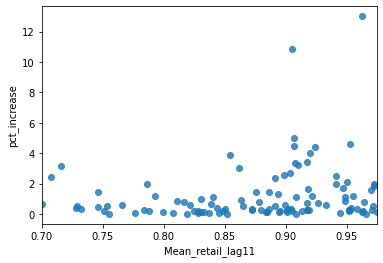

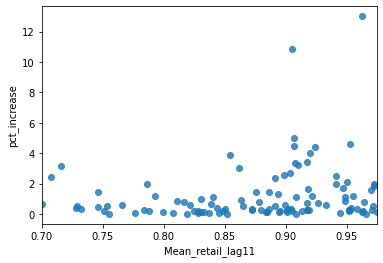

In [96]:
sns.regplot( 'Mean_retail_lag11', 'pct_increase', data=df)

In [98]:
df.pct_increase.max()

inf

inf